In [24]:
import numpy as np  
import pandas as pd  
from pandas_datareader import data as wb  
import matplotlib.pyplot as plt  
from scipy.stats import norm
%matplotlib inline
pd.options.plotting.backend = "plotly"


In [74]:
ticker = 'TSLA' 
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source='yahoo', start='2010-1-1')['Adj Close']
data['pct_change'] = data['TSLA'].pct_change()
data = data.reset_index()

data.head(5)

,Date,TSLA,pct_change
0,2010-06-29,4.778,NaN
1,2010-06-30,4.766,-0.002512
2,2010-07-01,4.392,-0.078472
3,2010-07-02,3.840,-0.125683
4,2010-07-06,3.222,-0.160938


In [86]:
data = data[data['Date'] > '2018-01-01']

print(data.shape)

(727, 3)


In [87]:
import plotly.express as px

fig = px.line(data, x='Date', y="TSLA")
fig.show()

In [88]:
log_returns = np.log(1 + data['TSLA'].pct_change())
log_returns.tail()

2613   -0.012957
2614   -0.007949
2615   -0.001004
2616    0.078939
2617    0.097098
Name: TSLA, dtype: float64

In [89]:
log_returns.plot()

In [90]:
data['pct_change'].plot()

In [91]:
u = log_returns.mean()
var = log_returns.var()
drift = u - (0.5 * var)

stdev = log_returns.std()

The second component of the Brownian motion is a random variable, z, a number corresponding to the distance between the mean and the events, expressed as the number of standard deviations.



In [92]:
x = np.random.rand(10, 2)


In [93]:
Z = norm.ppf(np.random.rand(10,2))

In [94]:
t_intervals = 1000
iterations = 20

In the parentheses, we will have the value of the drift and the product of the standard deviation and the random component, created with the help of the “norm” module. Its percentage value was generated with NumPy’s “rand” function, using “time intervals” and “iterations” specifying the dimensions of the array filled with values from 0 to 1.



In [95]:
daily_returns = np.exp(drift + stdev * norm.ppf(np.random.rand(t_intervals, iterations)))

In [96]:
daily_returns

array([[0.97979071, 0.95371321, 0.94494478, ..., 1.00183303, 0.96755247,
        0.98388074],
       [1.01000244, 0.96264094, 0.98296747, ..., 1.04218457, 1.03929954,
        1.03774232],
       [0.95454174, 0.99446215, 1.01091246, ..., 1.06049475, 0.9969221 ,
        0.94533103],
       ...,
       [1.06210502, 1.03840017, 0.99822367, ..., 0.96025567, 0.98697759,
        1.00079523],
       [1.03298877, 0.95128978, 1.01318045, ..., 1.0524218 , 1.06173533,
        1.00704688],
       [0.99294019, 1.02181948, 1.01418624, ..., 1.04209523, 0.95753318,
        1.01476792]])

In [97]:
S0 = data['TSLA'].iloc[-1]

In [98]:
price_list = np.zeros_like(daily_returns)


In [99]:
price_list.shape

(1000, 20)

In [100]:
price_list[0] = S0


In [101]:
price_list

array([[486.64001465, 486.64001465, 486.64001465, ..., 486.64001465,
        486.64001465, 486.64001465],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

In [102]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]

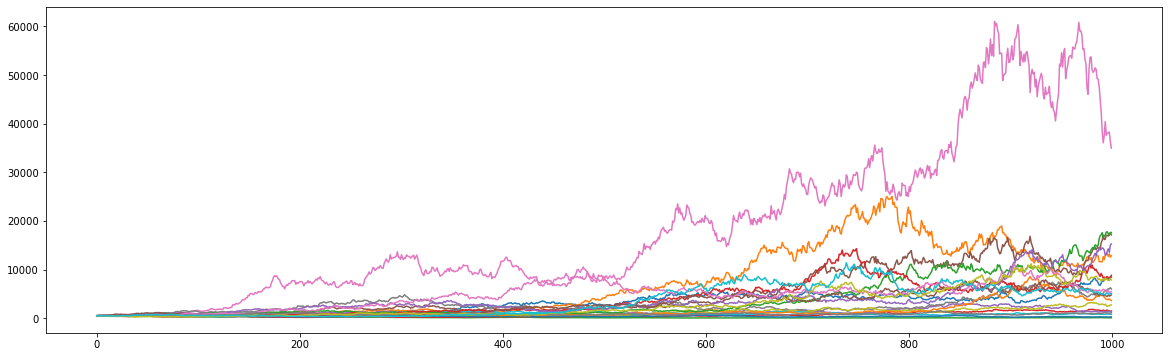

In [104]:
plt.figure(figsize=(20,6))
plt.plot(price_list);
